In [2]:
import pandas as pd
import numpy as np

In [3]:
bucket = "summer2022ai"

In [4]:
data_key_Grocery = "project/Grocery.txt"
data_location_g = "s3://{}/{}".format(bucket,data_key_Grocery)

Grocery = pd.read_csv(data_location_g, sep="\t")

In [5]:
data_key_furniture = "project/Furniture.txt"
data_location_f = "s3://{}/{}".format(bucket,data_key_furniture)

Furniture = pd.read_csv(data_location_f, sep="\t")

In [6]:
data_key_Electronics = "project/Electronics.txt"
data_location_e = "s3://{}/{}".format(bucket,data_key_Electronics)


Electronics = pd.read_csv(data_location_e, sep="\t")

In [12]:
Combined = pd.concat([Furniture, Electronics,Grocery],ignore_index=True)

In [13]:
Combined = Combined[Combined['review_body'].notna()]

In [72]:
Grocery_S = Grocery.iloc[:50000]
Grocery_S

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,42521656,R26MV8D0KG6QI6,B000SAQCWC,159713740,"The Cravings Place Chocolate Chunk Cookie Mix,...",Grocery,5,0,0,N,Y,Using these for years - love them.,"As a family allergic to wheat, dairy, eggs, nu...",2015-08-31
1,US,12049833,R1OF8GP57AQ1A0,B00509LVIQ,138680402,"Mauna Loa Macadamias, 11 Ounce Packages",Grocery,5,0,0,N,Y,Wonderful,"My favorite nut. Creamy, crunchy, salty, and ...",2015-08-31
2,US,107642,R3VDC1QB6MC4ZZ,B00KHXESLC,252021703,Organic Matcha Green Tea Powder - 100% Pure Ma...,Grocery,5,0,0,N,N,Five Stars,This green tea tastes so good! My girlfriend l...,2015-08-31
3,US,6042304,R12FA3DCF8F9ER,B000F8JIIC,752728342,15oz Raspberry Lyons Designer Dessert Syrup Sauce,Grocery,5,0,0,N,Y,Five Stars,I love Melissa's brand but this is a great sec...,2015-08-31
4,US,18123821,RTWHVNV6X4CNJ,B004ZWR9RQ,552138758,"Stride Spark Kinetic Fruit Sugar Free Gum, 14-...",Grocery,5,0,0,N,Y,Five Stars,good,2015-08-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,US,38793102,R3BYQXPRGPES2O,B00874MVT4,345025893,Clearbrook Farms Large Desert Size Sweet Tart ...,Grocery,5,0,0,N,Y,They're light and flaky and great to use with ...,These shells are delightful. They're light and...,2015-08-14
50001,US,38842635,RLBQCKDDROP5D,B00AWJ78BI,85306113,Gevalia Single-Cup Coffee for Keurig K-Cup Bre...,Grocery,5,0,0,N,Y,Five Stars,Good tasting dark roast coffee.,2015-08-14
50002,US,13191666,R2BLVMLXEXNKML,B001EXZ8DG,149470480,Puroast Low Acid Coffee Organic French Roast G...,Grocery,2,0,0,N,Y,Two Stars,Didn't like it it tastes like medicine.,2015-08-14
50003,US,15507169,R3DTHQ0ONRQ1CK,B00C4XIJLS,363617212,"Perugina Glacia Hard Candies, 2.2 lb Bag in a ...",Grocery,5,0,0,N,Y,My clients and I love it!,It is delicious! I'll buy it again.,2015-08-14


In [73]:
#Grocery_S = pd.get_dummies(Grocery_S, columns=['vine','verified_purchase'])
Grocery_S["verified"] = np.where(Grocery_S['verified_purchase']=="Y", 1, 0)
Grocery_S["vine_program"] = np.where(Grocery_S['vine']=="Y", 1, 0)



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [74]:
Grocery_S.columns

Index(['marketplace', 'customer_id', 'review_id', 'product_id',
       'product_parent', 'product_title', 'product_category', 'star_rating',
       'helpful_votes', 'total_votes', 'vine', 'verified_purchase',
       'review_headline', 'review_body', 'review_date', 'verified',
       'vine_program'],
      dtype='object')

In [75]:
cols = [0,1,2,4,6,10,11,12,13,14]
Grocery_S.drop(Grocery_S.columns[cols], inplace=True, axis=1)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [76]:
Grocery_S.head()

,product_id,product_title,star_rating,helpful_votes,total_votes,verified,vine_program
0,B000SAQCWC,"The Cravings Place Chocolate Chunk Cookie Mix,...",5,0,0,1,0
1,B00509LVIQ,"Mauna Loa Macadamias, 11 Ounce Packages",5,0,0,1,0
2,B00KHXESLC,Organic Matcha Green Tea Powder - 100% Pure Ma...,5,0,0,0,0
3,B000F8JIIC,15oz Raspberry Lyons Designer Dessert Syrup Sauce,5,0,0,1,0
4,B004ZWR9RQ,"Stride Spark Kinetic Fruit Sugar Free Gum, 14-...",5,0,0,1,0


In [77]:
# Define X.
X = Grocery_S.drop(columns = ['product_id','product_title'], axis=1)

In [130]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5, random_state=1)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [131]:
km.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [132]:
Grocery_S['cluster'] = km.labels_
Grocery_S.sort_values('cluster').head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,product_id,product_title,star_rating,helpful_votes,total_votes,verified,vine_program,cluster,cen_x,cen_y,c
0,B000SAQCWC,"The Cravings Place Chocolate Chunk Cookie Mix,...",5,0,0,1,0,0,NaN,NaN,NaN
33285,B00B04CVTS,"Pana Pesca Breaded Jumbo Clam Strip, 5 Pound -...",5,4,4,1,0,0,NaN,NaN,NaN
33286,B001EQ5AHW,"Hershey's Cocoa, 8-Ounce Cans (Pack of 6)",5,0,0,1,0,0,NaN,NaN,NaN
33287,B00I2LNNA8,Gourmesso Flavors - Nespresso compatible flavo...,3,3,3,1,0,0,NaN,NaN,NaN
33288,B0009F3S78,"Traditional Medicinals Organic Herbal Power, 1...",4,4,5,0,0,0,NaN,NaN,NaN


In [133]:
Grocery_S[Grocery_S.cluster == 0].star_rating.value_counts()

5    35640
4     5505
1     3536
3     3092
2     2024
Name: star_rating, dtype: int64

In [134]:
Grocery_S[Grocery_S.cluster == 0].product_id.value_counts()

B00DS842HS    201
B00Y1C9770    163
B00EKLPLU4     80
B00V9FJZMY     73
B008JA7CRW     70
             ... 
B00UCDKLX6      1
B007GZS0UE      1
B00T0BUAWI      1
B0038KOTVU      1
B00JLRKV2U      1
Name: product_id, Length: 28557, dtype: int64

In [135]:
Grocery_S[(Grocery_S['cluster'] == 0)& (Grocery_S['product_id'] == "B00Y1C9770")].value_counts()
#subset_of_df = dfobj[(dfobj['Name'] == 'Jack') | (dfobj['Subject'] == 'Math')]


product_id  product_title                                               star_rating  helpful_votes  total_votes  verified  vine_program  cluster  cen_x  cen_y  c  
B00Y1C9770  Jif Chocolate Nut Butter Almond Granola Bars, 5 Count Pack  3            0              0            0         0             0        s      t      red    7
                                                                                                    1            0         0             0        s      t      red    2
                                                                        1            0              0            0         0             0        s      t      red    1
                                                                        2            0              0            0         0             0        s      t      red    1
                                                                        3            1              1            0         0             0        s      t      

In [136]:
km.cluster_centers_

array([[ 4.35929875e+00,  4.79587124e-01,  6.63413459e-01,
         8.85394702e-01,  3.81549089e-03],
       [ 1.00000000e+00,  1.37700000e+03,  1.46300000e+03,
         1.00000000e+00,  0.00000000e+00],
       [ 3.46153846e+00,  1.58307692e+02,  1.72000000e+02,
         9.23076923e-01,  4.33680869e-19],
       [ 5.00000000e+00,  5.91000000e+02,  7.15000000e+02,
         1.00000000e+00,  0.00000000e+00],
       [ 3.55319149e+00,  3.30425532e+01,  3.86382979e+01,
         7.87234043e-01, -1.60461922e-17]])

In [137]:
Grocery_S.groupby('cluster').mean()

,star_rating,helpful_votes,total_votes,verified,vine_program
cluster,,,,,
0,4.359299,0.479587,0.663413,0.885395,0.003815
1,1.000000,1377.000000,1463.000000,1.000000,0.000000
2,3.461538,158.307692,172.000000,0.923077,0.000000
3,5.000000,591.000000,715.000000,1.000000,0.000000
4,3.553191,33.042553,38.638298,0.787234,0.000000


In [138]:
centers = Grocery_S.groupby('cluster').mean()

In [139]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

In [140]:
import numpy as np
colors = np.array(['red', 'green', 'blue', 'yellow','purple'])

In [90]:
#y_kmeans = km.predict(X)

In [120]:
plt.scatter(, Grocery_S.cluster, c=Grocery_S.cluster);

# Cluster centers, marked by "+"
#plt.scatter(centers.vine_program, centers.star_rating, linewidths=3, marker='+', s=300, c='black');

# Add labels.
#plt.xlabel('verified')
#plt.ylabel('star_rating')

## find the best K

In [142]:
centroids = km.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
Grocery_S['cen_x'] = Grocery_S.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2],3:cen_x[3], 4:cen_x[4]})
Grocery_S['cen_y'] = Grocery_S.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2],3:cen_y[3], 4:cen_y[4]})
# define and map colors
colors = ['red', 'green', 'blue', 'yellow','purple']
Grocery_S['c'] = Grocery_S.cluster.map({0:colors[0], 1:colors[1], 2:colors[2],3:colors[3], 4:colors[4]})

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [143]:
Grocery_S

,product_id,product_title,star_rating,helpful_votes,total_votes,verified,vine_program,cluster,cen_x,cen_y,c
0,B000SAQCWC,"The Cravings Place Chocolate Chunk Cookie Mix,...",5,0,0,1,0,0,4.359299,0.479587,red
1,B00509LVIQ,"Mauna Loa Macadamias, 11 Ounce Packages",5,0,0,1,0,0,4.359299,0.479587,red
2,B00KHXESLC,Organic Matcha Green Tea Powder - 100% Pure Ma...,5,0,0,0,0,0,4.359299,0.479587,red
3,B000F8JIIC,15oz Raspberry Lyons Designer Dessert Syrup Sauce,5,0,0,1,0,0,4.359299,0.479587,red
4,B004ZWR9RQ,"Stride Spark Kinetic Fruit Sugar Free Gum, 14-...",5,0,0,1,0,0,4.359299,0.479587,red
...,...,...,...,...,...,...,...,...,...,...,...
50000,B00874MVT4,Clearbrook Farms Large Desert Size Sweet Tart ...,5,0,0,1,0,0,4.359299,0.479587,red
50001,B00AWJ78BI,Gevalia Single-Cup Coffee for Keurig K-Cup Bre...,5,0,0,1,0,0,4.359299,0.479587,red
50002,B001EXZ8DG,Puroast Low Acid Coffee Organic French Roast G...,2,0,0,1,0,0,4.359299,0.479587,red
50003,B00C4XIJLS,"Perugina Glacia Hard Candies, 2.2 lb Bag in a ...",5,0,0,1,0,0,4.359299,0.479587,red


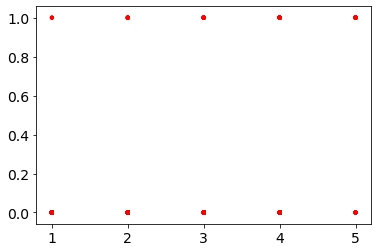

In [144]:
import matplotlib.pyplot as plt
plt.scatter(Grocery_S.star_rating, Grocery_S.vine_program, c=Grocery_S.c, alpha = 0.6, s=10)

In [ ]:
feature_cols = ['verified', 'vine_program', 'helpful_votes', 'total_votes']
X = Grocery_S[feature_cols]

In [79]:
y = Grocery_S.star_rating

In [80]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)


In [82]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [83]:
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.6924


In [84]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.7216


In [85]:
most_freq_class = y_train.value_counts().index[0]

print(y_train.value_counts())
most_freq_class

5    5411
4     862
1     547
3     398
2     282
Name: star_rating, dtype: int64


5

In [86]:
k_range = list(range(1, 101))
training_error = []
testing_error = []

# Find test accuracy for all values of K between 1 and 100 (inclusive).
for k in k_range:

    # Instantiate the model with the current K value.
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Calculate training error (error = 1 - accuracy).
    y_pred_class = knn.predict(X)
    training_accuracy = metrics.accuracy_score(y, y_pred_class)
    training_error.append(1 - training_accuracy)
    
    # Calculate testing error.
    y_pred_class = knn.predict(X_test)
    testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
    testing_error.append(1 - testing_accuracy)

In [87]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [88]:
column_dict = {'K': k_range, 'training error':training_error, 'testing error':testing_error}
df = pd.DataFrame(column_dict).set_index('K').sort_index(ascending=False)
df.head()

,training error,testing error
K,,
100,0.2758,0.2776
99,0.2757,0.2776
98,0.2757,0.2776
97,0.2757,0.2776
96,0.2757,0.2776


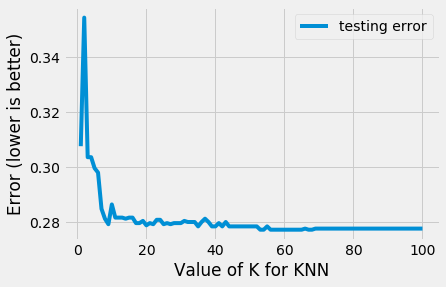

In [89]:
df.plot(y='testing error');
plt.xlabel('Value of K for KNN');
plt.ylabel('Error (lower is better)');

In [90]:
df.sort_values('testing error').head()

,training error,testing error
K,,
64,0.2754,0.2772
67,0.2750,0.2772
65,0.2749,0.2772
63,0.2754,0.2772
62,0.2754,0.2772


# JADE COMBINED

In [14]:
Combined_S = Combined.sample(n=200000, replace=True)
Combined_S["verifiedpurchase_Y"] = np.where(Combined_S['verified_purchase']=="Y", 1, 0)
Combined_S["vine_Y"] = np.where(Combined_S['vine']=="Y", 1, 0)
cols = [0,1,2,4,6,10,11,12,13,14]
Combined_S.drop(Combined_S.columns[cols], inplace=True, axis=1)
Combined_S

,product_id,product_title,star_rating,helpful_votes,total_votes,verifiedpurchase_Y,vine_Y
5785166,B000MUT91Y,Kinder Schoko-Bons 125g,5,0,0,1,0
3210646,B004K2WZS4,Blue Lounge Design CableDrop Cable Management ...,5,1,1,1,0
4201173,B003OJ0MU2,McCormick Mexican Dry Seasoning Mixes,5,0,0,1,0
3652118,B001FA1NF0,Apple iPod nano 16 GB Purple,5,0,0,0,0
3974676,B00FMBL4Z2,Gevalia Cafe Style Beverages,2,0,0,1,0
...,...,...,...,...,...,...,...
3992910,B002H2BAMQ,Jes Teriyaki Marinade & Sauce (12x15.7Oz),5,0,0,1,0
384399,B002EEO2EK,Skyline Furniture Surrey Micro-Suede-Upholster...,5,1,1,1,0
3688370,B000VABP9Y,Sony NWZS616FPNK 4GB Walkman Video MP3 Player ...,5,0,0,1,0
4237629,B00D4M2GBC,Tillamook Country Smoker - TERIYAKI Stick 36 c...,4,0,0,1,0


In [15]:
feature_cols = ['verifiedpurchase_Y', 'vine_Y', 'helpful_votes', 'total_votes']
X = Combined_S[feature_cols]
y = Combined_S.star_rating
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=5)
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#Train Model and Predict
k = 5 
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
Pred_y = neigh.predict(X_test)
print("Accuracy of model at K=5 is",metrics.accuracy_score(y_test, Pred_y))

Accuracy of model at K=5 is 0.6015166666666667


In [ ]:
error_rate = []
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))



NameError: name 'plt' is not defined

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
%matplotlib inline
from sklearn import datasets
from sklearn.cluster import KMeans

Minimum error:- 0.3747 at K = 28


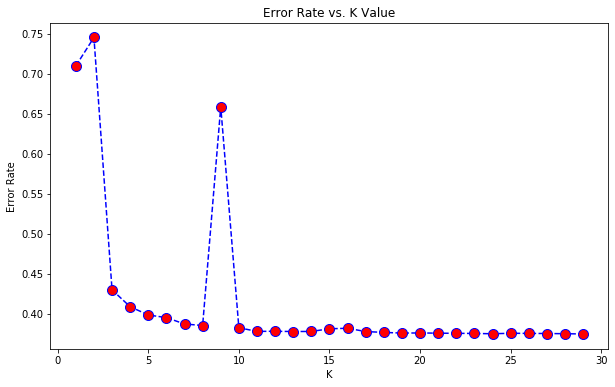

In [18]:


plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.6241666666666666 at K = 18


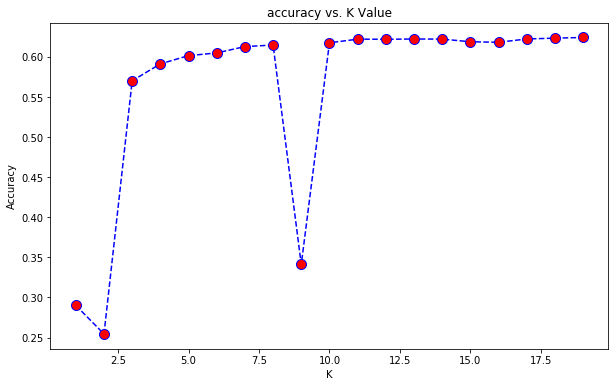

In [19]:
acc = []
from sklearn import metrics
for i in range(1,20):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,20),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [20]:
most_freq_class = y_train.value_counts().index[0]

print(y_train.value_counts())
most_freq_class

5    86794
4    22124
1    13305
3    10418
2     7359
Name: star_rating, dtype: int64


5

In [21]:
C = Combined_S.drop(columns = ['product_id','product_title'], axis=1)
from sklearn.cluster import KMeans
km = KMeans(n_clusters=18, random_state=1)
km.fit(C)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=18, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [22]:
km.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [23]:
Combined_S['cluster'] = km.labels_
Combined_S.sort_values('cluster').head()

,product_id,product_title,star_rating,helpful_votes,total_votes,verifiedpurchase_Y,vine_Y,cluster
5785166,B000MUT91Y,Kinder Schoko-Bons 125g,5,0,0,1,0,0
3071043,B005O81U9S,Logitech 915-000148 Harmony 200 Remote for Thr...,5,1,1,0,0,0
267764,B00302ICKU,Honey-Can-Do Toy Organizer and Storage Bins,5,0,0,1,0,0
4014218,B004VLVJAO,Great Northern Beans,5,0,0,1,0,0
1337033,B00P1R18J4,NEON GREEN Replacement Cable/Wire For Beats By...,5,1,1,1,0,0


In [24]:
km.cluster_centers_

array([[4.80256850e+00, 2.70237631e-01, 3.65709615e-01, 8.78143433e-01,
        5.22095155e-03],
       [4.50000000e+00, 3.74200000e+03, 3.96000000e+03, 5.00000000e-01,
        0.00000000e+00],
       [2.66666667e+00, 9.24000000e+02, 9.86333333e+02, 0.00000000e+00,
        0.00000000e+00],
       [3.70588235e+00, 1.07117647e+02, 1.17973262e+02, 5.88235294e-01,
        1.06951872e-02],
       [3.76744186e+00, 1.69127907e+02, 1.86046512e+02, 6.39534884e-01,
        2.32558140e-02],
       [5.00000000e+00, 5.40400000e+03, 5.81300000e+03, 0.00000000e+00,
        0.00000000e+00],
       [3.53625866e+00, 1.94258661e+01, 2.40480370e+01, 6.08775982e-01,
        1.10854503e-02],
       [4.33333333e+00, 1.65333333e+03, 1.72100000e+03, 3.33333333e-01,
        0.00000000e+00],
       [4.05555556e+00, 3.40666667e+02, 3.68444444e+02, 7.22222222e-01,
        5.55555556e-02],
       [3.61167513e+00, 6.32182741e+01, 7.25203046e+01, 6.01522843e-01,
        1.52284264e-02],
       [3.53579069e+00, 9.2580

In [25]:
Combined_S.groupby('cluster').mean()

,star_rating,helpful_votes,total_votes,verifiedpurchase_Y,vine_Y
cluster,,,,,
0,4.802569,0.270238,0.365710,0.878143,0.005221
1,4.500000,3742.000000,3960.000000,0.500000,0.000000
2,2.666667,924.000000,986.333333,0.000000,0.000000
3,3.705882,107.117647,117.973262,0.588235,0.010695
4,3.767442,169.127907,186.046512,0.639535,0.023256
5,5.000000,5404.000000,5813.000000,0.000000,0.000000
6,3.533918,19.407937,24.053530,0.609137,0.011075
7,4.333333,1653.333333,1721.000000,0.333333,0.000000
8,4.055556,340.666667,368.444444,0.722222,0.055556


In [26]:
from random import randint

colors = []
n = 18

for i in range(n):
    colors.append('#%06X' % randint(0, 0xFFFFFF))
    
colors

['#B6607A',
 '#E60DFC',
 '#CAB331',
 '#AA2A60',
 '#3D5552',
 '#0A16B0',
 '#FBA3C5',
 '#B3CFDB',
 '#F205C2',
 '#B7BC48',
 '#57D1A3',
 '#B005A6',
 '#116A9C',
 '#89DFA1',
 '#0759B0',
 '#BCC8F3',
 '#65315D',
 '#EE9B3D']

Text(0, 0.5, 'helpful_votes')

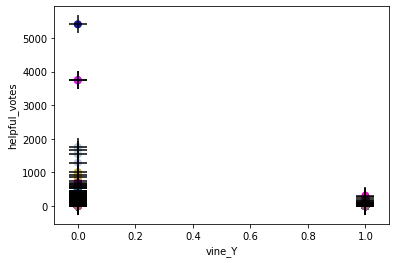

In [27]:
colors = np.array(colors)
plt.scatter(Combined_S.vine_Y, Combined_S.helpful_votes, c=colors[Combined_S.cluster], s=50);

# Cluster centers, marked by "+"
plt.scatter(Combined_S.vine_Y, Combined_S.helpful_votes, linewidths=3, marker='+', s=300, c='black');

# Add labels.
plt.xlabel('vine_Y')
plt.ylabel('helpful_votes')

In [31]:
Combined_S[Combined_S.cluster == 5]

,product_id,product_title,star_rating,helpful_votes,total_votes,verifiedpurchase_Y,vine_Y,cluster
108585,B00QBZ25R4,Tuft & Needle Mattress,5,5404,5813,0,0,5


In [38]:
Cluster0 = Combined_S[Combined_S.cluster == 0]

In [45]:
Cluster0.product_id.value_counts()

B003L1ZYYM    439
B00DS842HS    297
B0002L5R78    276
B0001FTVEK    250
B0019EHU8G    245
             ... 
B001E5E0CO      1
B006Z974D6      1
B001AQW75Y      1
B000G007YI      1
B008MD2ZPK      1
Name: product_id, Length: 65213, dtype: int64

In [57]:
Cluster0[Cluster0.product_id == "B003L1ZYYM"]

,product_id,product_title,star_rating,helpful_votes,total_votes,verifiedpurchase_Y,vine_Y,cluster
3311639,B003L1ZYYM,AmazonBasics High-Speed HDMI Cable - 6.5 Feet ...,5,0,0,1,0,0
2556900,B003L1ZYYM,AmazonBasics High-Speed HDMI Cable - 6.5 Feet ...,5,0,0,1,0,0
1435187,B003L1ZYYM,AmazonBasics High-Speed HDMI Cable - 6.5 Feet ...,5,0,0,1,0,0
1021026,B003L1ZYYM,AmazonBasics High-Speed HDMI Cable - 6.5 Feet ...,5,0,0,1,0,0
2402775,B003L1ZYYM,AmazonBasics High-Speed HDMI Cable - 6.5 Feet ...,4,0,0,1,0,0
...,...,...,...,...,...,...,...,...
881683,B003L1ZYYM,AmazonBasics High-Speed HDMI Cable - 6.5 Feet ...,5,0,0,1,0,0
2486213,B003L1ZYYM,AmazonBasics High-Speed HDMI Cable - 6.5 Feet ...,4,0,0,1,0,0
1363821,B003L1ZYYM,AmazonBasics High-Speed HDMI Cable - 6.5 Feet ...,5,0,1,1,0,0
1873512,B003L1ZYYM,AmazonBasics High-Speed HDMI Cable - 6.5 Feet ...,5,0,0,1,0,0


In [58]:
Cluster0[Cluster0.product_id == "B003L1ZYYM"].mean()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


star_rating           4.863326
helpful_votes         0.047836
total_votes           0.075171
verifiedpurchase_Y    0.970387
vine_Y                0.000000
cluster               0.000000
dtype: float64

In [59]:
Combined_S[Combined_S.cluster == 13]

,product_id,product_title,star_rating,helpful_votes,total_votes,verifiedpurchase_Y,vine_Y,cluster
3301345,B005MR7YV4,Nyrius NAEB500 High Performance Noise Isolatin...,5,3,4,0,0,13
2462328,B0041T8FIK,Supersonic SC-609 360&amp;ordm; HDTV Digital,5,4,4,0,0,13
5620022,B0048GF8KO,Milky Bar Buttons 4pk- Fast Free Shipping,5,5,6,1,0,13
6213681,B000A0WLFC,Dave's Gourmet Super Hot Wood Set Ultra-Hot Cr...,4,0,9,0,0,13
3399633,B003M8HWDA,Philips 30-Pin iPod/iPhone Dual Alarm Clock FM...,3,2,7,1,0,13
...,...,...,...,...,...,...,...,...
107444,B005DC5730,Bobkona Miranda 3-Piece Reversible Sectional w...,5,5,7,1,0,13
4296451,B0091UNRP0,Tootsie Pops Limited Edition Chocolate Pops,4,3,3,0,0,13
10778,B00KM6RSHU,Home Life 8-Inch Independently-Pocket Coil Pre...,1,4,5,1,0,13
2825634,B007YL84VA,Ceptics Europe Travel Plug Adapter (Type C) - ...,5,4,4,1,0,13


In [60]:
Cluster13 = Combined_S[Combined_S.cluster == 13]

In [61]:
Cluster13.product_id.value_counts()

B0051SU0OW    37
B004QK7HI8    28
B00D5Q75RC    26
B00M2OGS08    17
B009ZGK6QS    12
              ..
B00CHHCBW4     1
B0044YMQIW     1
B0072L5O4M     1
B00RBIC1IS     1
B008YA9VVM     1
Name: product_id, Length: 16598, dtype: int64

In [64]:
Cluster13[Cluster13.product_id == "B0051SU0OW"]

,product_id,product_title,star_rating,helpful_votes,total_votes,verifiedpurchase_Y,vine_Y,cluster
6039604,B0051SU0OW,"Ekobrew Coffee Reusable Filter, Small, Violet",5,4,4,1,0,13
5985344,B0051SU0OW,"Ekobrew Coffee Reusable Filter, Small, Violet",5,3,3,1,0,13
5951515,B0051SU0OW,"Ekobrew Coffee Reusable Filter, Small, Violet",5,3,3,1,0,13
5984023,B0051SU0OW,"Ekobrew Coffee Reusable Filter, Small, Violet",1,3,7,1,0,13
4280511,B0051SU0OW,"Ekobrew Coffee Reusable Filter, Small, Violet",1,3,3,1,0,13
5937031,B0051SU0OW,"Ekobrew Coffee Reusable Filter, Small, Violet",5,2,3,1,0,13
5998945,B0051SU0OW,"Ekobrew Coffee Reusable Filter, Small, Violet",5,4,5,1,0,13
5997105,B0051SU0OW,"Ekobrew Coffee Reusable Filter, Small, Violet",3,3,3,1,0,13
5883593,B0051SU0OW,"Ekobrew Coffee Reusable Filter, Small, Violet",5,4,4,0,0,13
5983921,B0051SU0OW,"Ekobrew Coffee Reusable Filter, Small, Violet",5,4,4,1,0,13


In [67]:
Cluster13[Cluster13.product_id == "B0051SU0OW"].mean()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


star_rating            4.324324
helpful_votes          3.594595
total_votes            4.162162
verifiedpurchase_Y     0.891892
vine_Y                 0.000000
cluster               13.000000
dtype: float64

In [69]:
Cluster14 = Combined_S[Combined_S.cluster == 14]

In [71]:
Cluster14.product_id.value_counts()

B0001FTVEK    67
B008KVUAGU    64
B00B46XUQU    52
B002MAPT7U    52
B004QK7HI8    50
              ..
B004CH4H6A     1
B00CIASDUO     1
B003VFLN9S     1
B000F4C62G     1
B002C73WS6     1
Name: product_id, Length: 22935, dtype: int64

In [72]:
Cluster14[Cluster14.product_id == "B0001FTVEK"]

,product_id,product_title,star_rating,helpful_votes,total_votes,verifiedpurchase_Y,vine_Y,cluster
1257789,B0001FTVEK,Sennheiser On-Ear 926MHz Wireless RF Headphone...,1,0,0,0,0,14
3724850,B0001FTVEK,Sennheiser On-Ear 926MHz Wireless RF Headphone...,3,0,0,1,0,14
1099354,B0001FTVEK,Sennheiser On-Ear 926MHz Wireless RF Headphone...,2,0,0,1,0,14
3666460,B0001FTVEK,Sennheiser On-Ear 926MHz Wireless RF Headphone...,1,0,1,1,0,14
2837149,B0001FTVEK,Sennheiser On-Ear 926MHz Wireless RF Headphone...,2,0,1,1,0,14
...,...,...,...,...,...,...,...,...
1423846,B0001FTVEK,Sennheiser On-Ear 926MHz Wireless RF Headphone...,1,0,1,1,0,14
1092835,B0001FTVEK,Sennheiser On-Ear 926MHz Wireless RF Headphone...,3,0,0,1,0,14
2637830,B0001FTVEK,Sennheiser On-Ear 926MHz Wireless RF Headphone...,1,2,3,1,0,14
1579188,B0001FTVEK,Sennheiser On-Ear 926MHz Wireless RF Headphone...,1,0,0,1,0,14


In [73]:
Cluster14[Cluster14.product_id == "B0001FTVEK"].mean()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


star_rating            1.985075
helpful_votes          0.373134
total_votes            0.611940
verifiedpurchase_Y     0.925373
vine_Y                 0.000000
cluster               14.000000
dtype: float64